## Multi-Agent Design

![image](https://microsoft.github.io/autogen/assets/images/autogen_agentchat-250ca64b77b87e70d34766a080bf6ba8.png)

## Library

In [1]:
! pip install pyautogen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00


## API Secret

In [2]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

## Config File

In [3]:
# config
llm_config = {"model": "gpt-3.5-turbo", 'api_key': OPENAI_API_KEY}

## Trial: `autogen` library

In [4]:
from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

In [5]:
reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

Sure, here's one for you:

Why couldn't the bicycle find its way home?

Because it lost its bearings!


In [6]:
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)
print(reply)

Of course! Just let me know which joke you'd like me to repeat.


## Application: Two-agent Conversation

In [7]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

In [8]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=10,
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe, did you hear about the claustrophobic astronaut? He just needed a little space!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! Speaking of space, I recently started dating an astronaut. She's out of this world!

--------------------------------------------------------------------------------
cathy (to joe):

That's awesome, Joe! Just make sure you don't let your relationship crash and burn!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, very true! I'll keep that in mind. By the way, did you hear about the mathematician who is afraid of negative numbers? He will stop at nothing to avoid them!

--------------------------------------------------------------------------------
cathy 

In [9]:
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': "I'm Joe. Cathy, let's keep the jokes rolling.",
  'role': 'assistant'},
 {'content': 'Hey Joe, did you hear about the claustrophobic astronaut? He '
             'just needed a little space!',
  'role': 'user'},
 {'content': "Haha, that's a good one, Cathy! Speaking of space, I recently "
             "started dating an astronaut. She's out of this world!",
  'role': 'assistant'},
 {'content': "That's awesome, Joe! Just make sure you don't let your "
             'relationship crash and burn!',
  'role': 'user'},
 {'content': "Haha, very true! I'll keep that in mind. By the way, did you "
             'hear about the mathematician who is afraid of negative numbers? '
             'He will stop at nothing to avoid them!',
  'role': 'assistant'},
 {'content': 'I love that one, Joe! Sounds like that mathematician just needs '
             'to work on his positivity!',
  'role': 'user'},
 {'content': 'Haha, definitely! Maybe he should try some addition to his life. '
        

## Application: Code Whisper

In [11]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json

In [14]:
assistant = AssistantAgent("assistant", llm_config=llm_config)

In [15]:
user_proxy = UserProxyAgent(
    "user_proxy", code_execution_config={"work_dir": "coding", "use_docker": False}
)  # IMPORTANT: set to True to run code in docker, recommended

In [21]:
user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD")

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the year-to-date (YTD) stock price change for NVDA (NVIDIA Corporation) and TSLA (Tesla, Inc.) stocks, we need historical stock price data for both companies. We can fetch this data using the `yfinance` library in Python and then plot the chart using `matplotlib`.

Here is the plan:
1. Install the `yfinance` library if you haven't already.
2. Fetch the historical stock price data for NVDA and TSLA from the beginning of the year until today.
3. Calculate the YTD stock price change for both NVDA and TSLA.
4. Plot a bar chart showing the YTD stock price change for NVDA and TSLA.

Let's start by fetching the historical stock price data for NVDA and TSLA.

--------------------------------------------------------------------------------
Provide feedback to assistant. Press enter to sk

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD', 'role': 'assistant'}, {'content': "To plot a chart of the year-to-date (YTD) stock price change for NVDA (NVIDIA Corporation) and TSLA (Tesla, Inc.) stocks, we need historical stock price data for both companies. We can fetch this data using the `yfinance` library in Python and then plot the chart using `matplotlib`.\n\nHere is the plan:\n1. Install the `yfinance` library if you haven't already.\n2. Fetch the historical stock price data for NVDA and TSLA from the beginning of the year until today.\n3. Calculate the YTD stock price change for both NVDA and TSLA.\n4. Plot a bar chart showing the YTD stock price change for NVDA and TSLA.\n\nLet's start by fetching the historical stock price data for NVDA and TSLA.", 'role': 'user'}, {'content': 'write the code for me to create a time-series plot', 'role': 'assistant'}, {'content': "```python\n# filename: stock_price_plot.py\nimport 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


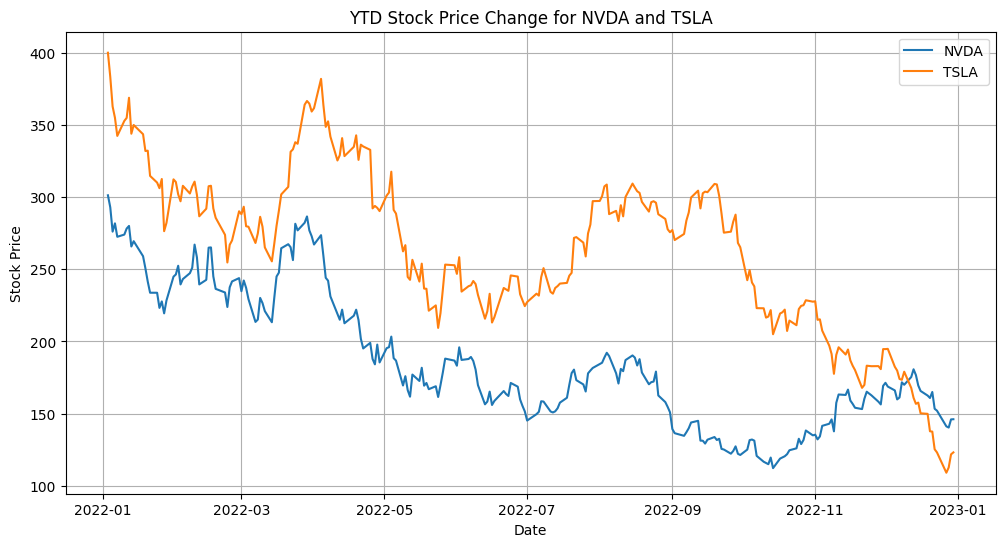

In [22]:
# Fetching historical stock price data for NVDA and TSLA
nvda_data = yf.download('NVDA', start='2022-01-01', end='2022-12-31')
tsla_data = yf.download('TSLA', start='2022-01-01', end='2022-12-31')

# Calculating YTD stock price change
nvda_ytd_change = (nvda_data['Close'][-1] - nvda_data['Close'][0]) / nvda_data['Close'][0] * 100
tsla_ytd_change = (tsla_data['Close'][-1] - tsla_data['Close'][0]) / tsla_data['Close'][0] * 100

# Plotting the time-series chart
plt.figure(figsize=(12, 6))
plt.plot(nvda_data['Close'], label='NVDA')
plt.plot(tsla_data['Close'], label='TSLA')
plt.title('YTD Stock Price Change for NVDA and TSLA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()